
## Appliance Energy Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
import os 
os.getcwd()

'/home/jupyter'

In [3]:
df = pd.read_csv("/home/jupyter/energydata_complete.csv", parse_dates=['date'])

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

# Data Exploration 

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
# presence of 0 whithin the df
zero = 0
for cols in df.columns:
    if zero in df[cols]:
        print('Found in '+cols) 

Found in date
Found in Appliances
Found in lights
Found in T1
Found in RH_1
Found in T2
Found in RH_2
Found in T3
Found in RH_3
Found in T4
Found in RH_4
Found in T5
Found in RH_5
Found in T6
Found in RH_6
Found in T7
Found in RH_7
Found in T8
Found in RH_8
Found in T9
Found in RH_9
Found in T_out
Found in Press_mm_hg
Found in RH_out
Found in Windspeed
Found in Visibility
Found in Tdewpoint
Found in rv1
Found in rv2


### Consideration

All variables present at least a zero in their rilevation. This can be attributed to an error in the process of acquisiton information. 
Temperature, Humidity, Windspeed, Dew point obviously cannot be as low as 0 not even just for a single entry. 

In [8]:
# Check for Null values in df
df.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

### This dataset is fully filled. 
### But are we sure that all the entries are useful? 

The number of the 0,1% top values of Appliances' load is 19 and they have power load higher than 140 Wh.


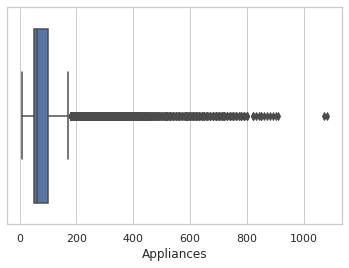

In [9]:
# Find outliers
sorted_appliances = df.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of Appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.Appliances)

In [10]:
# Removing outliers
df = df.dropna()
df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)

In [11]:
# Columns based on type 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9", "RH_out"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [12]:
# variables divisions 
#feature_vars = [col_temp + col_hum + col_weather + col_light + col_randoms ]
#target_var = [col_target]

In [13]:
#feature_vars.describe()

In [14]:
#target_var.describe()

### Observations 

1. Lights - More than 75% of the column is filled with zeros. I can't use any technique to replace those zeros, thus, for now it is bettere to remove it. In addition I can't use any fillied techniques to preserv it and it will negatively inflict the model I am going to apply.  

2. Humidiy  - As expected the most humid place within the house is RH_5 (Bathroom) with a range between 29.82% to 96.32%. 
 

In [15]:
df = df.drop(['lights'], axis=1)

# Data Visualization

In [16]:
# Set the style
plt.style.use('fivethirtyeight')

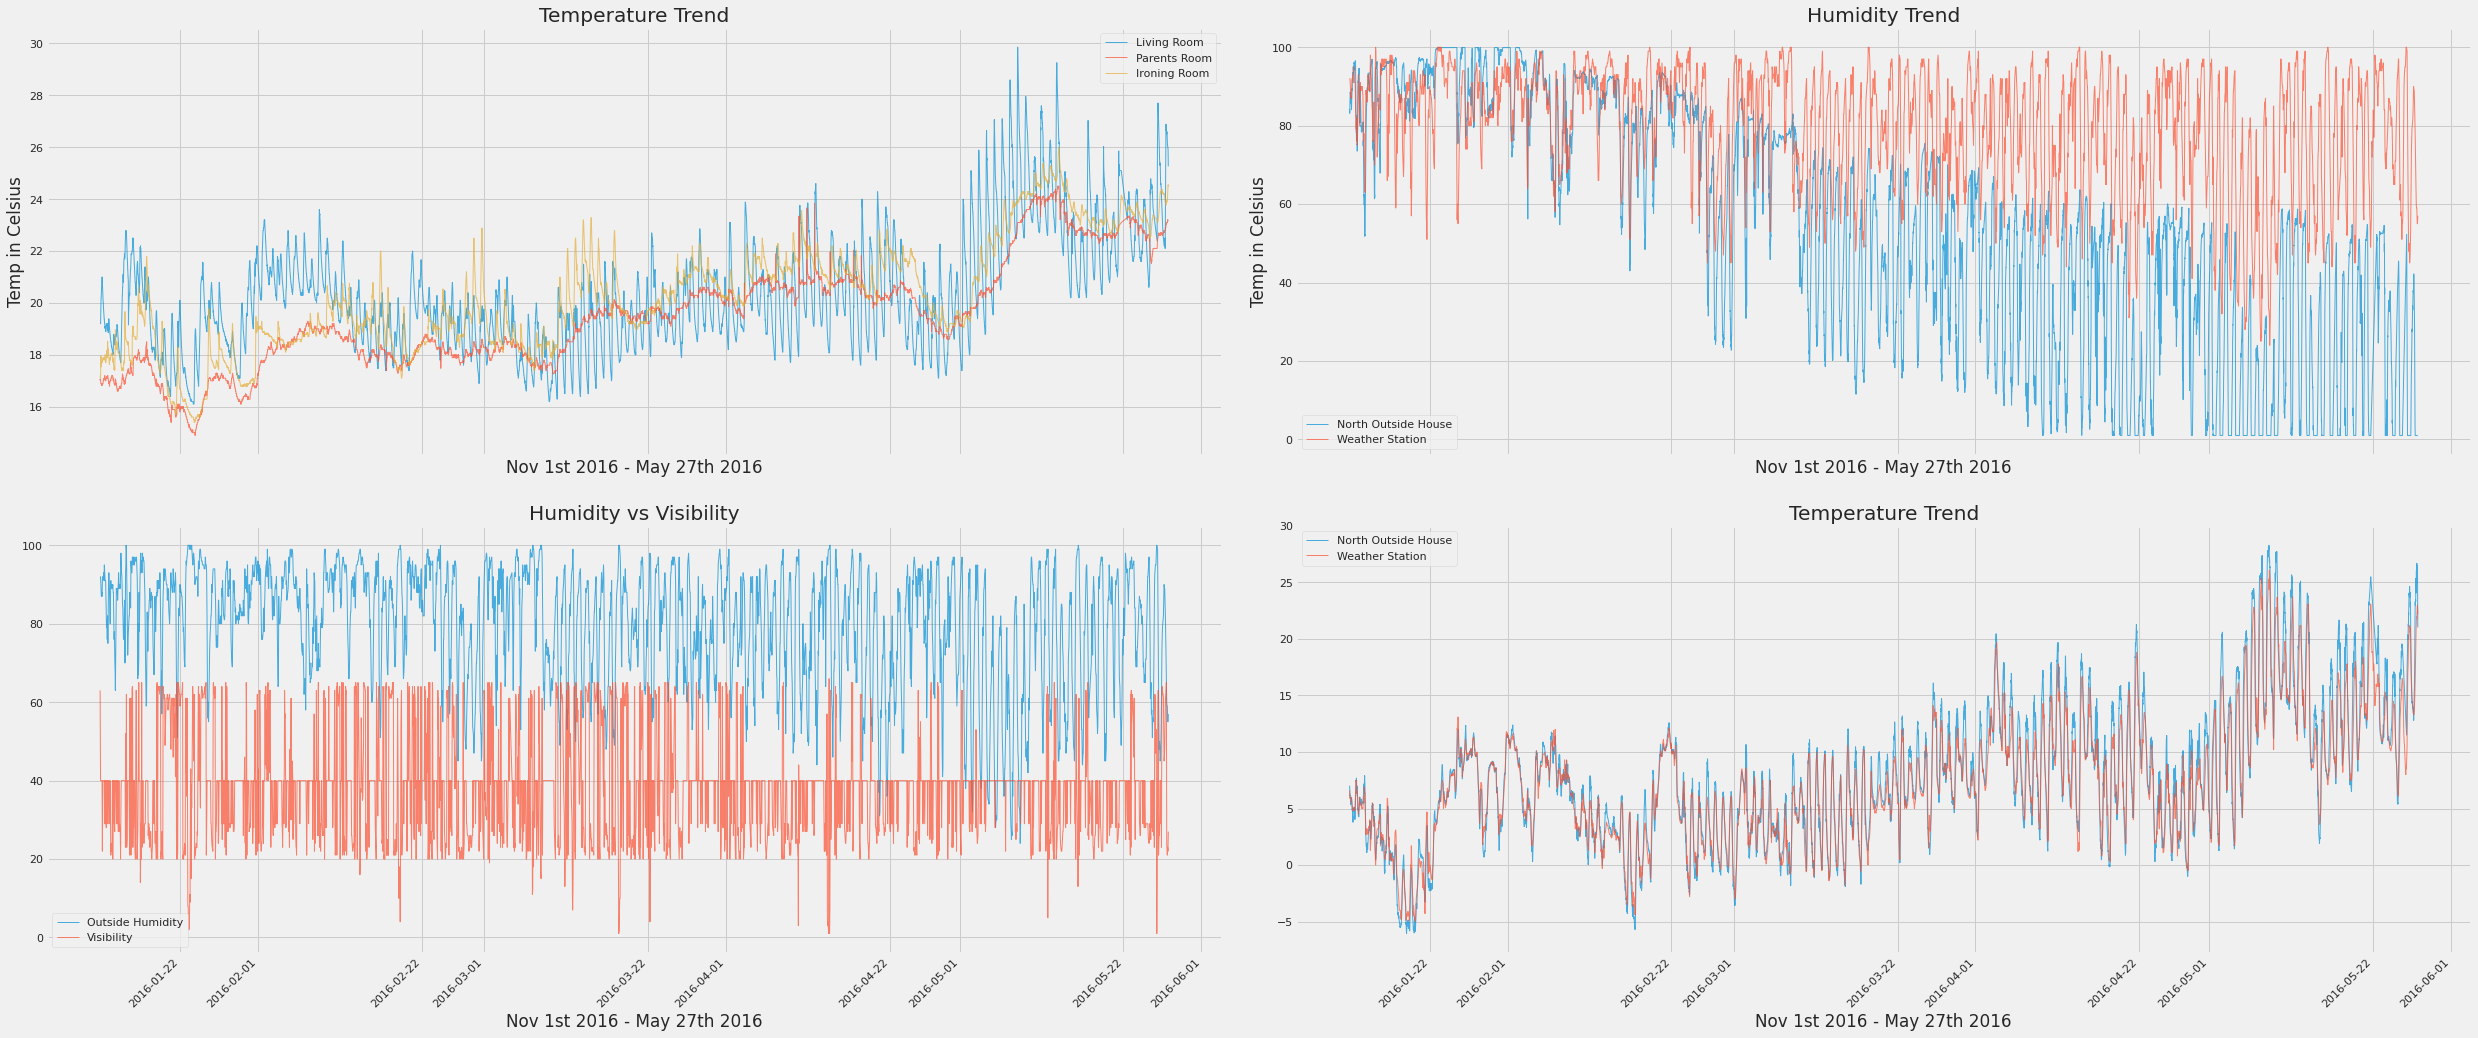

In [17]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (35,15))
fig.autofmt_xdate(rotation = 45)

# TEMPERATURE

# Living Room 
ax1.plot(df.date, df['T2'], linewidth=1, alpha=.7, label = "Living Room")
ax1.set_xlabel('Nov 1st 2016 - May 27th 2016'); ax1.set_ylabel('Temp in Celsius'); ax1.set_title('Temperature Trend')
# Parents Room 
ax1.plot(df.date, df['T9'], linewidth=1, alpha=.7, label = "Parents Room")
ax1.set_xlabel('Nov 1st 2016 - May 27th 2016');
# Ironing Room 
ax1.plot(df.date, df['T7'], linewidth=1, alpha=.7, label = "Ironing Room")
ax1.set_xlabel('Nov 1st 2016 - May 27th 2016'); 
ax1.legend()

# HUMIDITY Outside vs HUMIDITY Wheather Station

# Outiside
ax2.plot(df.date, df.RH_6, linewidth=1, alpha=.7, label = "North Outside House")
ax2.set_xlabel('Nov 1st 2016 - May 27th 2016'); ax2.set_ylabel('Humidity in %'); ax2.set_title('Humidity Trend')
# Weather Station
ax2.plot(df.date, df.RH_out, linewidth=1, alpha=.7, label = "Weather Station")
ax2.set_xlabel('Nov 1st 2016 - May 27th 2016')
ax2.legend()

# OUTSIDE HUMIDITY (maybe fog?) vs VISIBILITY 

# Windspeed
ax3.plot(df.date, df.RH_out, linewidth=1, alpha=.7, label="Outside Humidity")
ax3.set_xlabel('Nov 1st 2016 - May 27th 2016'), ax3.set_title('Humidity vs Visibility')
# Visibility
ax3.plot(df.date, df.Visibility, linewidth=1, alpha=.7, label="Visibility")
ax3.set_xlabel('Nov 1st 2016 - May 27th 2016')
ax3.legend()


# TEMPERATURE Outside vs TEMPERATURE Wheather Station
# Outiside
ax4.plot(df.date, df.T6, linewidth=1, alpha=.7, label = "North Outside House")
ax4.set_xlabel('Nov 1st 2016 - May 27th 2016'); ax2.set_ylabel('Temp in Celsius'); ax4.set_title('Temperature Trend')
# Weather Station
ax4.plot(df.date, df.T_out, linewidth=1, alpha=.7, label = "Weather Station")
ax4.set_xlabel('Nov 1st 2016 - May 27th 2016')
ax4.legend()


plt.tight_layout(pad=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bc59bd10>,
      dtype=object)

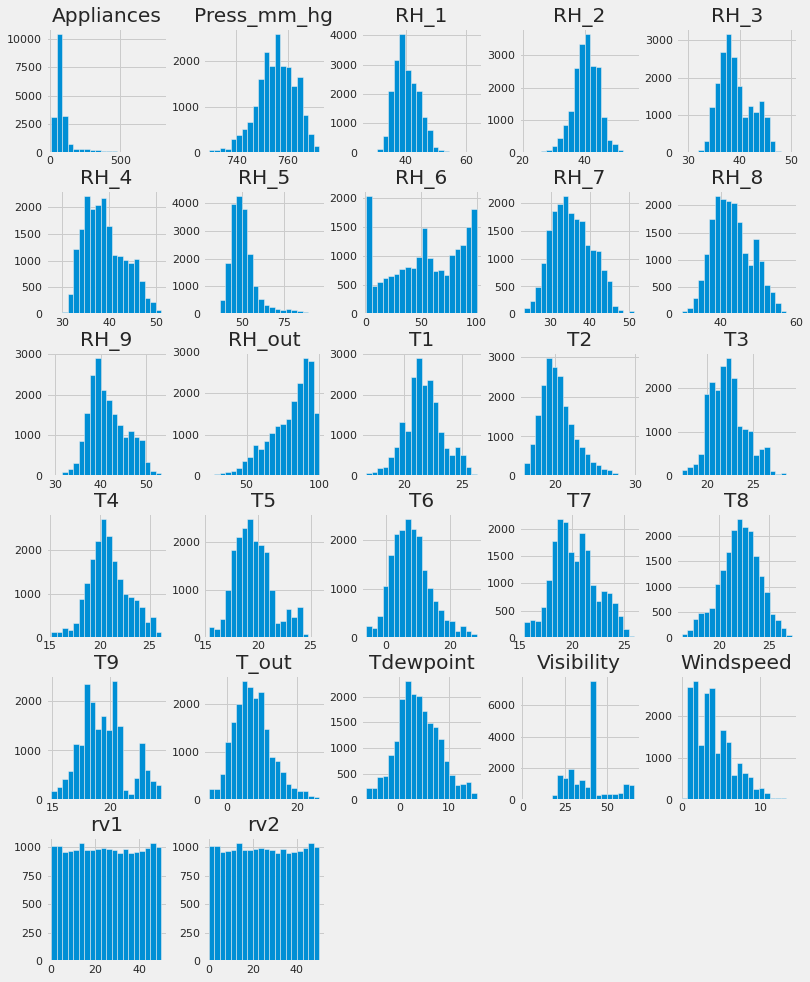

In [18]:
# Histogram of all the features to understand the distribution
df.hist(bins = 20 , figsize= (12,16))

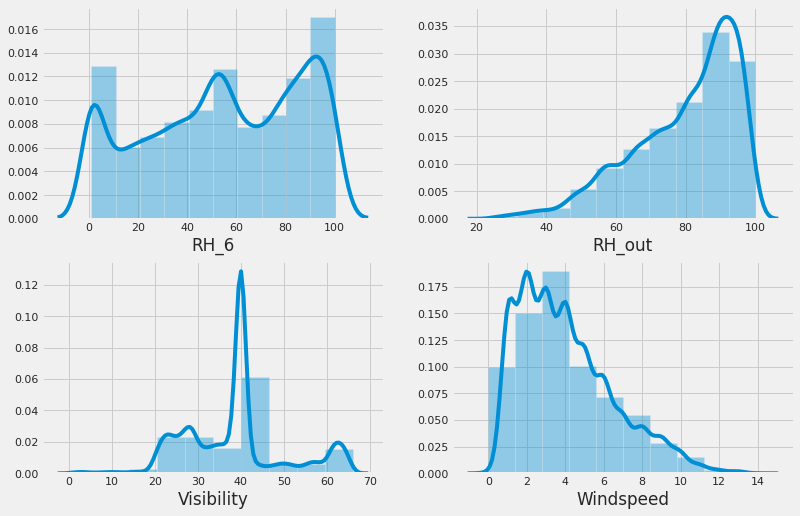

In [19]:
# focused displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(df["RH_6"],bins=10, ax=ax[0][0])
vis2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

## Awesome, another skewed distribution!

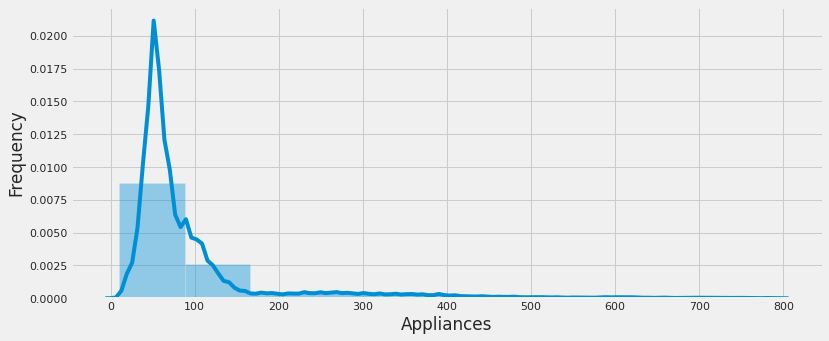

In [20]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(df["Appliances"] , bins=10 ) 

In [21]:
#log appliances
df['log_appliances'] = np.log(df.Appliances)

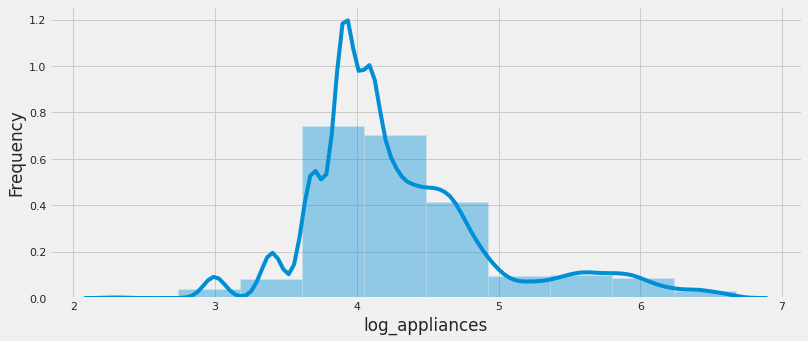

In [22]:
# Distribution of values in log_appliances column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(df["log_appliances"] , bins=10 ) ;

In [23]:
# Drop date column, I can add it later on
df = df.drop("date", axis=1)

In [24]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'log_appliances'],
      dtype='object')

# Let's remove humidity's columns for this first trial, I can add it later on 

In [25]:
#df = df.drop(col_hum, axis=1)

## Features and Targets and Convert Data to Arrays

In [26]:
# Labels are the values we want to predict
labels = np.array(df['log_appliances'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop(['log_appliances', 'Appliances'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

## Establish Baseline

Our baseline is the error we would get if we simply predict the average consumption in Watt/hour for Appliances.

In [27]:
### TODO: TROVARE UNA STRATEGIA PER STABILIRE UNA BASELINE

In [28]:
# The baseline predictions is the average value of Watt/hour
#baseline_preds = test_features[:, feature_list.index('Appliances')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# with a test_size = 0.33 I get a Training Set to small, let's set it to .025
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 1234)

In [30]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (14788, 26)
Training Labels Shape: (14788,)
Testing Features Shape: (4930, 26)
Testing Labels Shape: (4930,)


In [31]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1234)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [32]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.24


In [33]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.6 %.


In [35]:
# Select one tree from the forest
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
# Export in dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Convert it in png
graph.write_png('tree.png')

In [36]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 45


### The image is quite large with 45 layer's level!
### Let's focus on just once

In [37]:
# Select just 3 levels among 35
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Select just one small
tree_small = rf_small.estimators_[1]
# Export as png
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

### Observation: there is a prevalence of Temperature features

## Variable importance

In [34]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sorting the second element in each tuple
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: T2                   Importance: 0.08
Variable: RH_1                 Importance: 0.06
Variable: RH_8                 Importance: 0.06
Variable: RH_9                 Importance: 0.06
Variable: RH_out               Importance: 0.06
Variable: RH_3                 Importance: 0.05
Variable: RH_5                 Importance: 0.05
Variable: T8                   Importance: 0.05
Variable: Press_mm_hg          Importance: 0.05
Variable: T3                   Importance: 0.04
Variable: T4                   Importance: 0.04
Variable: RH_4                 Importance: 0.04
Variable: T6                   Importance: 0.04
Variable: RH_7                 Importance: 0.04
Variable: T1                   Importance: 0.03
Variable: RH_2                 Importance: 0.03
Variable: T5                   Importance: 0.03
Variable: RH_6                 Importance: 0.03
Variable: T7                   Importance: 0.03
Variable: T_out                Importance: 0.03
Variable: Tdewpoint            Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Cumulative Importances')

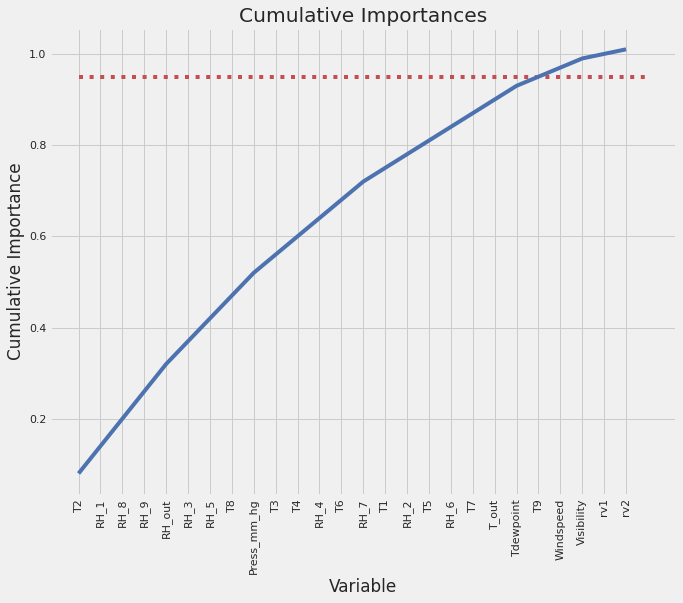

In [35]:
# list of x locations for plotting
x_values = list(range(len(importances))) 

# List of features sorted from most to least important. Take the 2nd value from the list of tuple above
sorted_importances = [importance[1] for importance in feature_importances]
# Take the 1st value from the list of tuple above
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

plt.figure(figsize=(10,8))

# Make a line graph
plt.plot(x_values, cumulative_importances, 'b-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dotted')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable') 
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

This is the contribution to the overall importance of each feature. The red dotted line is set at 95% of total importance accounted for.

In [36]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1, "on", len(feature_list), "total.")

Number of features for 95% importance: 22 on 26 total.


In [37]:
print(sorted_features)

['T2', 'RH_1', 'RH_8', 'RH_9', 'RH_out', 'RH_3', 'RH_5', 'T8', 'Press_mm_hg', 'T3', 'T4', 'RH_4', 'T6', 'RH_7', 'T1', 'RH_2', 'T5', 'RH_6', 'T7', 'T_out', 'Tdewpoint', 'T9', 'Windspeed', 'Visibility', 'rv1', 'rv2']


### Consideration

First 3:
- T2 : temperature in lviign room area
- Press_mm_hg : is humidty in living room area in %
- T3 : temperature laundry

Remark: This is the prove on my small_tree.png analysis -> "there is a prevalence of temperature features"

Last 3:
- Visibilitiy: not surprising
- Random variable 1: not surprising
- Random variable 2: not surprising

### Let's make a Forest Tree with the most 3 important variables

In [38]:
# New random forest with only the two most important variables
#rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=1234)
# Extract the two most important features
#important_indices = [feature_list.index('T2'), feature_list.index('Press_mm_hg'), feature_list.index('T3')]
#train_important = train_features[:, important_indices]
#test_important = test_features[:, important_indices]
# Train the random forest
#rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
#predictions = rf_most_important.predict(test_important)
#errors = abs(predictions - test_labels)
# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#mape = np.mean(100 * (errors / test_labels))
#accuracy = 100 - mape
#print('Accuracy:', round(accuracy, 2), '%.')


Super! This means if we want to reduce the power computational stress we can work with top 3 features without losing model accuracy. 

### Let's try with the 5 most important feature and let's see what changes...

In [39]:
# New random forest with only the two most important variables
#rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=1234)
# Extract the two most important features
#important_indices = [feature_list.index('T2'), feature_list.index('Press_mm_hg'), feature_list.index('T3'), feature_list.index('T3'), feature_list.index('T8'), feature_list.index('Td')]
#train_important = train_features[:, important_indices]
#test_important = test_features[:, important_indices]
# Train the random forest
#rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
#predictions = rf_most_important.predict(test_important)
#errors = abs(predictions - test_labels)
# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#mape = np.mean(100 * (errors / test_labels))
#accuracy = 100 - mape
#print('Accuracy:', round(accuracy, 2), '%.')



That's the the prove we must use the whole model's feature. Ah, by the way, this is trivial, since the difference in every weighted features is quite small.

# Improve the RF

In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training. Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model. However, evaluating each model only on the training set can lead to one of the most fundamental problems in machine learning: overfitting.

### Restrict to the Most 8 Important Features

In [40]:
# Names of five importances accounting for 95% of total importance
important_feature_names = ['T2', 'RH_1', 'RH_8', 'RH_9', 'RH_out', 'RH_3', 'RH_5', 'T8']

# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (14788, 8)
Important test features shape: (4930, 8)


In [41]:
# Use only the most important features
train_features = important_train_features[:]
test_features = important_test_features[:]

# Update feature list for visualizations
feature_list = important_feature_names[:]

### Examine the Default Random Forest to Determine Parameters¶

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1234)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}


## Cross Validation - KFold CV

### Random Search Cross Validation

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #10
# Number of features to consider at every split
#max_features = ['auto', 'sqrt'] #2
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] #10
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)

IndentationError: unexpected indent (<ipython-input-47-9dafdf42b3b9>, line 19)

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 2)] #2
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] #1
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 2)] #2 
max_depth.append(None) #1
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [5, 10],
 'n_estimators': [500, 1000]}


There are 2 * 3 * 2 * 2 * 2 * 2 = 96 settings.
- Will my 1,3 GHz Intel Core i5 survive?
- Will be worth it?

In [45]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

## Evaluate function

In [46]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

### Evaluate the default model

In [47]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 1234)
base_model.fit(train_features, train_labels)
evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.2472 degrees.
Accuracy = 94.38%.


### Evaluate the best random search model

In [48]:
best_random = rf_random.best_estimator_
evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.2385 degrees.
Accuracy = 94.57%.


## Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ["sqrt","auto","log2"] + [],
    'min_samples_leaf': [1],
    'min_samples_split': [6],
    'n_estimators': [800, 1200]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)


IndentationError: unexpected indent (<ipython-input-80-6047a9c62dff>, line 5)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
evaluate(best_grid, test_features, test_labels)

### Another Round of Grid Search¶

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 60, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [6],
    'n_estimators': [75, 100, 125]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_ad = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

grid_search_ad.fit(train_features, train_labels)

In [ ]:
grid_search_ad.best_params_

In [ ]:
best_grid_ad = grid_search_ad.best_estimator_
evaluate(best_grid_ad, test_features, test_labels)

## Final model

## LightGBM

In [54]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(train_features, train_labels)
lgb_eval = lgb.Dataset(test_features, test_labels, reference=lgb_train)

model = lgb.LGBMRegressor()
model.fit(train_features, train_labels)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
params = {
    'boosting_type': 'rf',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 300,
    'max_depth': 500,
    'learning_rate': 0.0001,
    'num_iterations': 600,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [56]:
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[1]	valid_0's l2: 0.256077	valid_0's l1: 0.347059
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.221806	valid_0's l1: 0.321398
[3]	valid_0's l2: 0.213149	valid_0's l1: 0.315231
[4]	valid_0's l2: 0.209223	valid_0's l1: 0.310249
[5]	valid_0's l2: 0.209657	valid_0's l1: 0.309987
[6]	valid_0's l2: 0.206478	valid_0's l1: 0.306776
[7]	valid_0's l2: 0.202925	valid_0's l1: 0.303375
[8]	valid_0's l2: 0.203235	valid_0's l1: 0.303186
[9]	valid_0's l2: 0.201204	valid_0's l1: 0.301246
[10]	valid_0's l2: 0.199887	valid_0's l1: 0.300246
[11]	valid_0's l2: 0.197986	valid_0's l1: 0.298962
[12]	valid_0's l2: 0.197109	valid_0's l1: 0.298086
[13]	valid_0's l2: 0.196591	valid_0's l1: 0.297602
[14]	valid_0's l2: 0.195404	valid_0's l1: 0.29643
[15]	valid_0's l2: 0.195547	valid_0's l1: 0.296181
[16]	valid_0's l2: 0.195273	valid_0's l1: 0.296332
[17]	valid_0's l2: 0.19537	valid_0's l1: 0.296357
[18]	valid_0's l2: 0.195502	valid_0's l1: 0.296287
[19]	valid_0's l2: 0.195037	valid

In [57]:
# predict
y_pred = gbm.predict(train_features, num_iteration=gbm.best_iteration)
# Calculate the absolute errors
errors = abs(y_pred - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.25


In [58]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / train_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('Variance:', np.var(y_pred))

Accuracy: 94.23 %.
Variance: 0.1883692766162788


In [59]:
# eval
print('The rmse of prediction is:', mean_squared_error(train_labels, y_pred) ** 0.5)
print('Bias:', round(np.mean(errors)-np.var(y_pred) ))

The rmse of prediction is: 0.3770356324958314
Bias: 0.0
